## Week 5: K-means Clustering

In [44]:
#Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from sklearn.cluster import KMeans

**(1a) Load the data file 'kmc-data1.xlsx' and visualize the data.**

In [45]:
# Write code here
names=['Column1','Column2']
data1 = pd.read_csv('kmc-data1.csv',header=None, names=names)

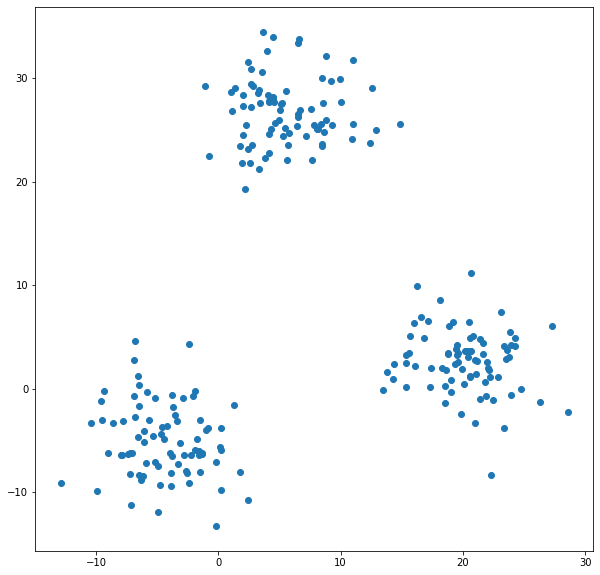

In [46]:
fig= plt.figure(figsize=(10,10))
plt.scatter(data1['Column1'],data1['Column2'])

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

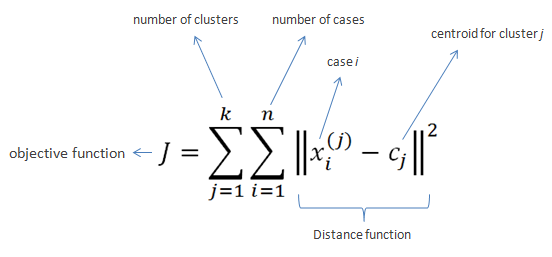

In [47]:
# Write code here
temp1 = pd.DataFrame(columns=names)
temp1['Column1'] = data1['Column1'] - 6.67
temp1['Column2'] = data1['Column2'] - 8.33

In [48]:
temp1['Column1'] *= temp1['Column1']
temp1['Column2'] *= temp1['Column2']

In [49]:
temp1['sum'] = temp1['Column1'] + temp1['Column2']

In [50]:
wcss = temp1['sum'].sum()

In [51]:
wcss

73409.43272669788

**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

In [52]:
import numpy as np
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    dist_list = np.zeros((size,K))
    #Your code here
    for i in range(K):
        temp = data - centroids[i]
        temp = temp.pow(2)
        temp['sum'] = temp.sum(axis=1)
        dist_list[:,i] = temp['sum']
    data_class = np.argmin(dist_list,axis=1)
    print("Exiting get_class")
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [53]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    #Your code here
    for i in range(K):
        temp = data.iloc[np.where(data_class==i)]
        centroids[i] = temp.mean()
    print("Exiting get_centroids")
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [54]:
def wcss(data,centroids,data_class,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    #Your code here
    for i in range(K):
        s = np.zeros(data.shape[0])
        temp = data.iloc[np.where(data_class==i)]
        temp = temp - centroids[i]
        temp = temp.pow(2)
        s = np.sum(temp,axis=1)
        wcss_clusterwise[i] = np.sum(s)
    wcss = np.sum(wcss_clusterwise) 
    print("Exiting wcss")
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster means be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [55]:
def kmeans(data,centroids,K):
    tolerance = np.full((K), 0.001)
    # Write code here
    centroids_old = centroids
    while(True):
        data_class = get_class(data,centroids,K)
        centroids = get_centroids(data,data_class,K)
        diff = centroids - centroids_old
        diff = diff**2
        diff = np.sum(diff,axis=1)
        diff = diff**(1/2)
        print(diff)
        if(all(diff<=tolerance)):
            print("Inside if")
            break
        else:
            centroids_old = centroids
    return(centroids,data_class)

In [56]:
centroids = [[10,30], [25,-5],[-5,10]]
centroids, data_class = kmeans(data1,centroids,3)

Exiting get_class
Exiting get_centroids
[ 5.40709147  9.02771798 14.70715861]
Exiting get_class
Exiting get_centroids
[0.1035486 0.        0.3108073]
Exiting get_class
Exiting get_centroids
[0. 0. 0.]
Inside if


In [57]:
centroids

array([[ 5.57364328, 26.74003828],
       [20.17029606,  2.62716538],
       [-4.44269723, -4.99310089]])

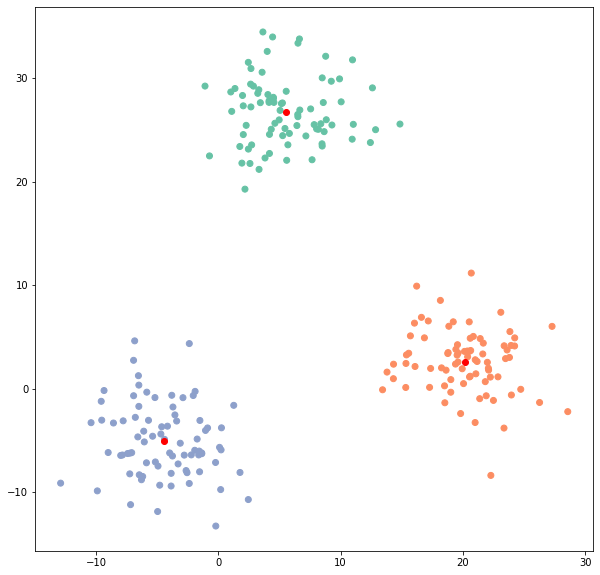

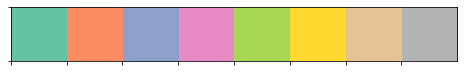

In [58]:
fig= plt.figure(figsize=(10,10))
ax = plt.gca()
sns.palplot(sns.color_palette("Set2", 8))
temp = data1.copy()
temp['Cluster'] = data_class
color_labels = temp['Cluster'].unique()
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(color_labels, rgb_values))
ax.scatter(temp['Column1'], temp['Column2'], c=temp['Cluster'].map(color_map))
for i in range(3):
    ax.plot(centroids[i][0],centroids[i][1],'ro')

**(1g) Compute the sum of square distance of each point from the cluster mean.**

In [59]:
#  Write code here
wcss(data1,centroids,data_class,3)

Exiting wcss


4936.722230493093

**(1h) Repeat the above exercise for all $K = 1,2,3,4$.**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Comment.**

In [60]:
#  Write code here
centroids = [[6.67,8.33]]
centroids, data_class = kmeans(data1,centroids,1)

Exiting get_class
Exiting get_centroids
[0.47686891]
Exiting get_class
Exiting get_centroids
[0.]
Inside if


In [61]:
d1 = wcss(data1,centroids,data_class,1)

Exiting wcss


In [62]:
centroids = [[10,30], [25,-5]]
centroids, data_class = kmeans(data1,centroids,2)

Exiting get_class
Exiting get_centroids
[ 6.31942518 17.28812426]
Exiting get_class
Exiting get_centroids
[0.91458939 0.27110575]
Exiting get_class
Exiting get_centroids
[0. 0.]
Inside if


In [63]:
d2 =wcss(data1,centroids,data_class,2)

Exiting wcss


In [64]:
centroids = [[10,30], [25,-5],[-5,10]]
centroids, data_class = kmeans(data1,centroids,3)

Exiting get_class
Exiting get_centroids
[ 5.40709147  9.02771798 14.70715861]
Exiting get_class
Exiting get_centroids
[0.1035486 0.        0.3108073]
Exiting get_class
Exiting get_centroids
[0. 0. 0.]
Inside if


In [65]:
d3 = wcss(data1,centroids,data_class,3)

Exiting wcss


In [66]:
centroids = [[10,30], [25,-5],[-5,10],[-10,-10]]
centroids, data_class = kmeans(data1,centroids,4)

Exiting get_class
Exiting get_centroids
[5.40709147 9.02771798 7.77176071 6.83981215]
Exiting get_class
Exiting get_centroids
[0.1035486  0.         2.28063793 0.33062214]
Exiting get_class
Exiting get_centroids
[0.         0.         0.91372408 0.40597842]
Exiting get_class
Exiting get_centroids
[0.         0.         0.69108824 0.412874  ]
Exiting get_class
Exiting get_centroids
[0.         0.         0.32301504 0.18879512]
Exiting get_class
Exiting get_centroids
[0.         0.         0.20604308 0.1287993 ]
Exiting get_class
Exiting get_centroids
[0. 0. 0. 0.]
Inside if


In [67]:
d4 = wcss(data1,centroids,data_class,4)

Exiting wcss


**(1i) Plot the WCSS for K = 1,2,3,4 and Comment**

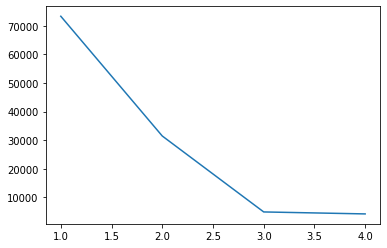

In [68]:
#  Write code here
a = [1,2,3,4]
d = [d1,d2,d3,d4]
plt.plot(a,d)

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data.**

In [69]:
#  Write code here
data2 = genfromtxt('kmc-data2.csv', delimiter=',')

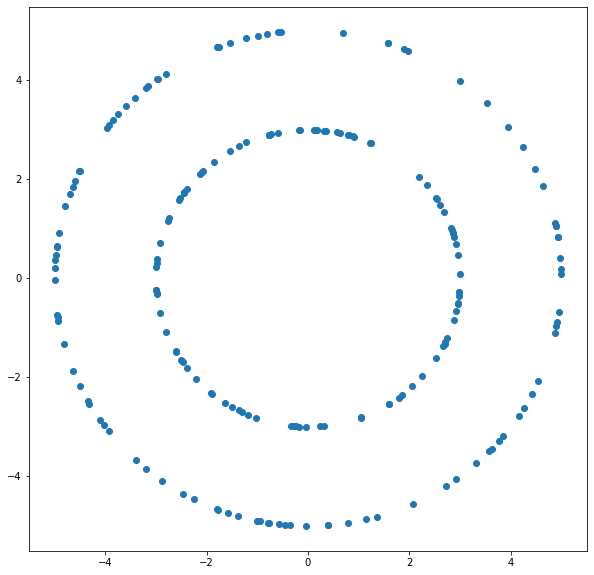

In [70]:
fig= plt.figure(figsize=(10,10))
plt.scatter(data2[:,0],data2[:,1])

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for K-means)**

In [71]:
#  Write code here
kmeans = KMeans(n_clusters=2, random_state=0).fit(data2)

In [72]:
centroids = kmeans.cluster_centers_

In [73]:
data_new = pd.DataFrame(columns=names)
data_new['Column1'] = data2[:,0]
data_new['Column2'] = data2[:,1]
data_new['Cluster'] = kmeans.labels_

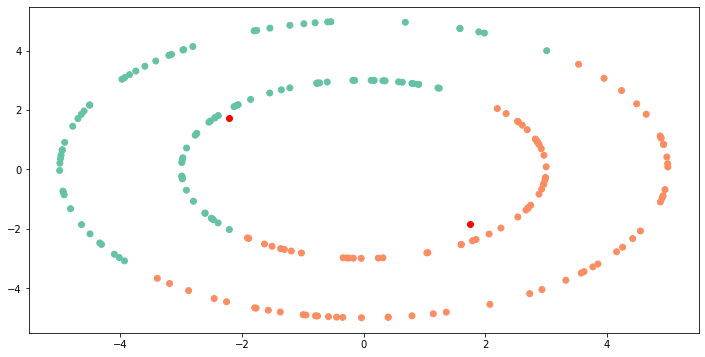

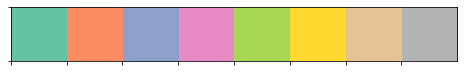

In [74]:
fig= plt.figure(figsize=(10,10))
ax = plt.gca()

sns.palplot(sns.color_palette("Set2", 8))

color_labels = data_new['Cluster'].unique()

rgb_values = sns.color_palette("Set2", 8)

color_map = dict(zip(color_labels, rgb_values))

ax.scatter(data_new['Column1'], data_new['Column2'], c=data_new['Cluster'].map(color_map))

for i in range(2):
    ax.plot(centroids[i][0],centroids[i][1],'ro')

**(2c) Suppose you want to cluster the data into two rings. Now, transform the data such that K-means clustering identifies the two rings as clusters.**

In [75]:
#  Write code here
data3 = pd.DataFrame()
data3['Column1'] = (data_new['Column1'].pow(2) + data_new['Column2'].pow(2)).pow(1/2)
data3['Column2'] = 0

In [76]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data3)

In [77]:
centroids = kmeans.cluster_centers_

In [78]:
data_new = pd.DataFrame(columns=names)
data_new['Column1'] = data2[:,0]
data_new['Column2'] = data2[:,1]
data_new['Cluster'] = kmeans.labels_

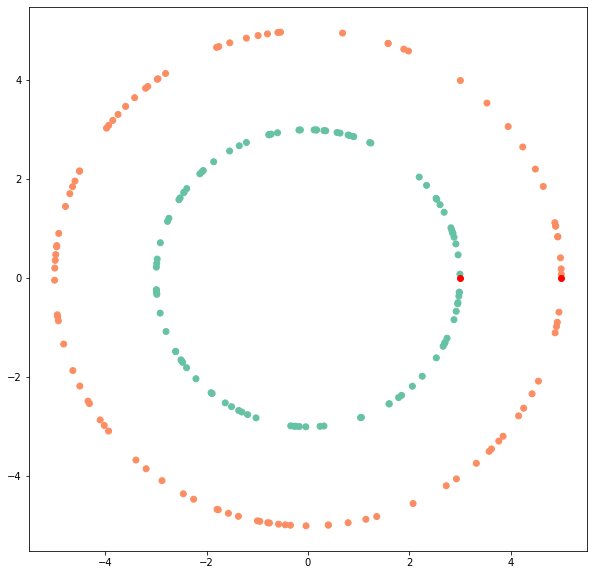

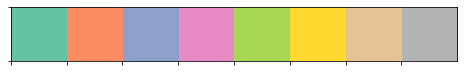

In [79]:
fig= plt.figure(figsize=(10,10))
ax = plt.gca()

sns.palplot(sns.color_palette("Set2", 8))

color_labels = data_new['Cluster'].unique()

rgb_values = sns.color_palette("Set2", 8)

color_map = dict(zip(color_labels, rgb_values))

ax.scatter(data_new['Column1'], data_new['Column2'], c=data_new['Cluster'].map(color_map))

for i in range(2):
    ax.plot(centroids[i][0],centroids[i][1],'ro')

**(3) Perform K-means clustering on Bank note dataset and also report accuracy. (You can use scikit-learn library for K-means)**

In [80]:
#  Write code here
data4 = genfromtxt('data_banknote_authentication.csv', delimiter=',')

In [81]:
data4

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data4[:,:-1],data4[:,-1], test_size=0.2, shuffle=True)

In [83]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [84]:
centroids = kmeans.cluster_centers_

In [85]:
preds = kmeans.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.4072727272727273